### Suicide Rates Overview 1985 to 2016

## Introduction
The suicide rate in lots of countries have been quite high for many years, including the developing and developed countries. At the begining, we'll see the suicide rate of sex, and then the age and generation. Next we'll plot the rank of suicide rate, it's clearly to understand the distribution of the suicide rate. Finally, we'll find out the key factors of high suicide rate.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd

%matplotlib inline

### Data at a glance

In [2]:
filename = "D:\Python file CSV\suicide rate.csv"
df = pd.read_csv(filename)

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# Rename the columns
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


In [5]:
df.shape

(27820, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicides_no     27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicides_pop    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
#Rearrange the dataset
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

In [8]:
df.describe()

,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


### Numerical analysis and visualization

In [9]:
# Analyze the suicides_no column
df['suicides_no'].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

In [10]:
df['suicides_no'].mean()

242.57440690150972

In [11]:
df['suicides_no'].median()

25.0

<AxesSubplot:>

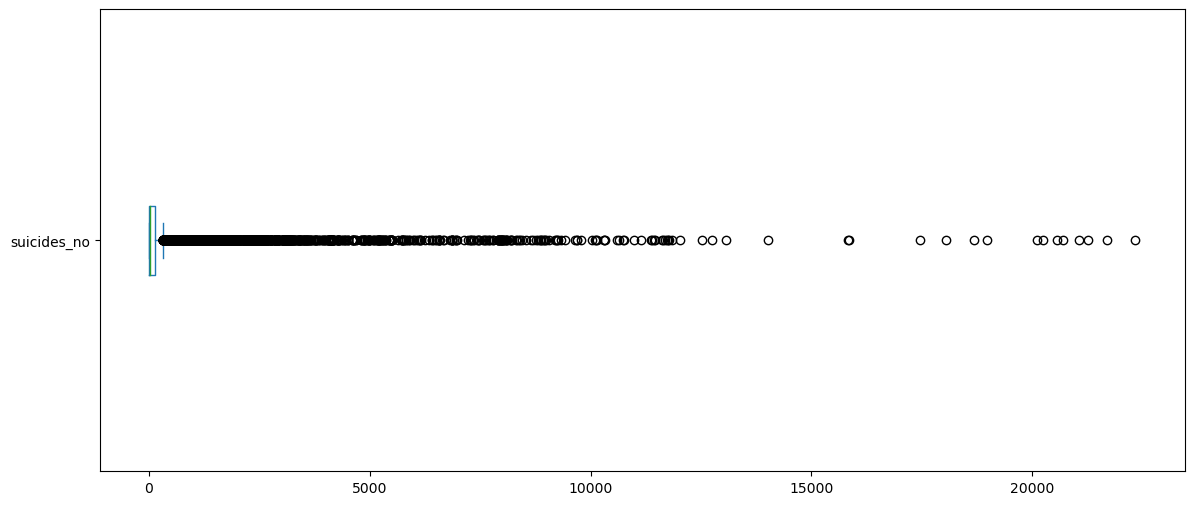

In [12]:
df['suicides_no'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

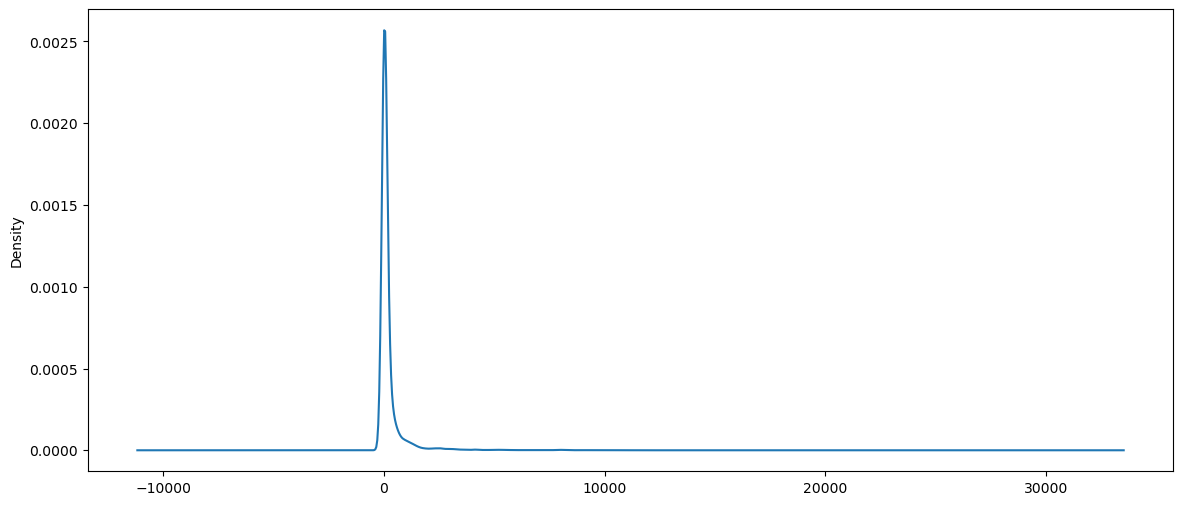

In [13]:
df['suicides_no'].plot(kind='density', figsize=(14,6))

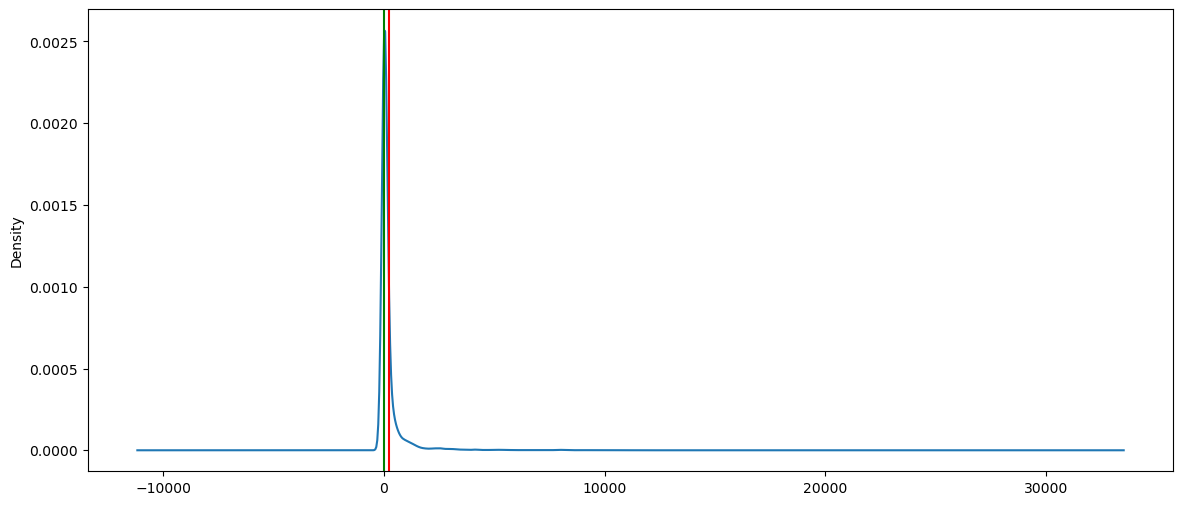

In [14]:
ax = df['suicides_no'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['suicides_no'].mean(), color='red')
ax.axvline(df['suicides_no'].median(), color='green')

### Categorical analysis and visualization

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


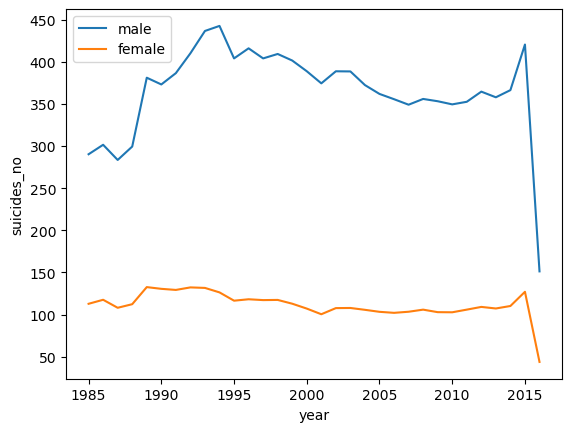

In [15]:
#Let's see the performance of sex
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

No matter which year it was, the suicides number of male was about three times higher than of female.

C:\Users\vinht\AppData\Local\Temp\ipykernel_17452\3334404521.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


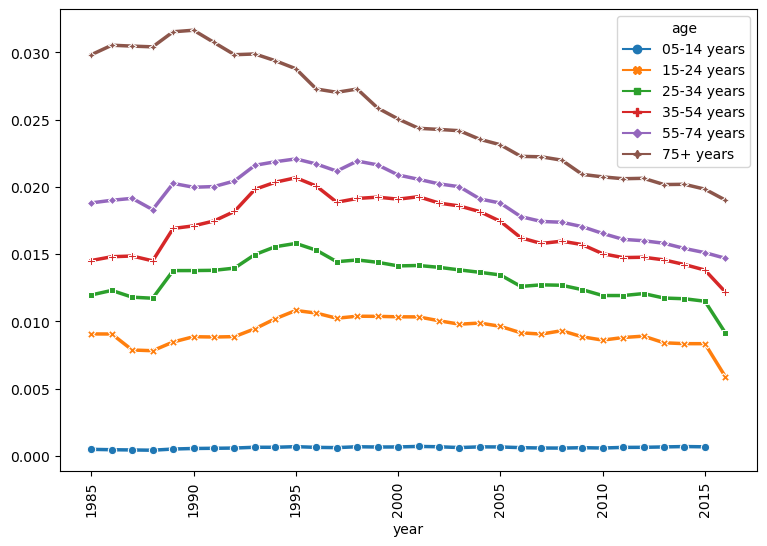

In [16]:
# Categorize age column and analyze
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

As we can see, the suicide rate was getting higher when the age was older. Therefore, aging was a factor of suicide

C:\Users\vinht\AppData\Local\Temp\ipykernel_17452\799650869.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_generation = df.groupby(["year","generation"])["suicides_no", "population"].sum()
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


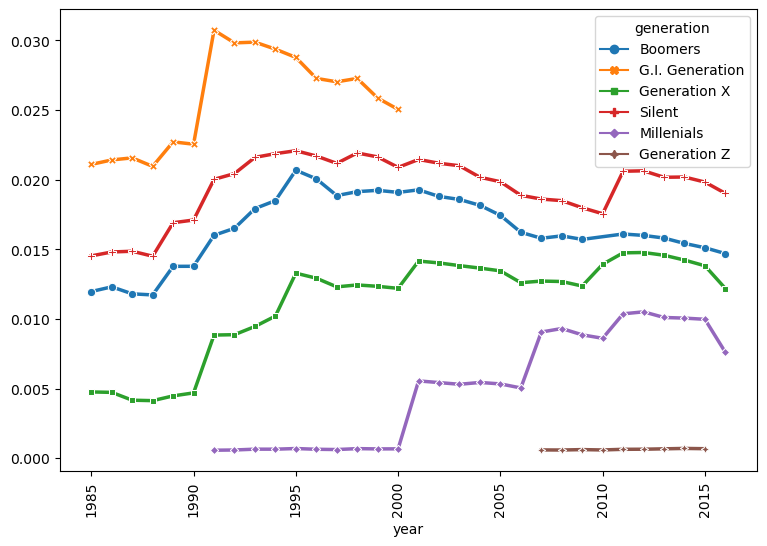

In [17]:
# Analyze the relationship between generation and suicides_no
df_generation = df.groupby(["year","generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation",
             data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
             , dashes=False)
plt.xticks(rotation = 90)
plt.show()

Before 2000, we can see that the highest suicide rate is G.I. generation, and this generation is also known as WW2 generation. They suffered from the worldwide great depression after WW2, at that time, the income, profit, taxes were decreased seriously, so this generation experienced economic and social turbulence.

Did this kind of social impact affect the suicide rate of G.I. generation? Compare to the Silent generation after 2000, the suicide rate was not that high.

Interestingly, the suicide rate of Generation X and Millenials increased significantly. Besides, the suicide rate rose rapidly once the average age of generation is over 20. Does it mean that the suicide rate of young persons went up when they were independent of their parents? In other words, healthy family affected to the suicide rate. 

# The suicide rate of countries

In [21]:
df1 = df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

In [23]:
import pycountry
import geopandas

In [26]:
#Transfer the country name into country code to draw map later
#Choose alpha3 country code

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [27]:
#Double check country name if the name in country list are not the same
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

In [28]:
#There are four country names are different, so I rename these names
df.replace("Czech Republic", "Czechia", inplace = True)
df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
df.replace("Macau", "Macao", inplace = True)
df.replace("Saint Vincent and Grenadines", "Saint Vincent and the Grenadines", inplace = True)

In [31]:
#Before ploting the suicide rate of each countries, we calcuate the suicide rate for each year, and then take the average of number as rate

df_suino = df.groupby(["country", "year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:]*100

df_pop = df.groupby(["country", "year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [32]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

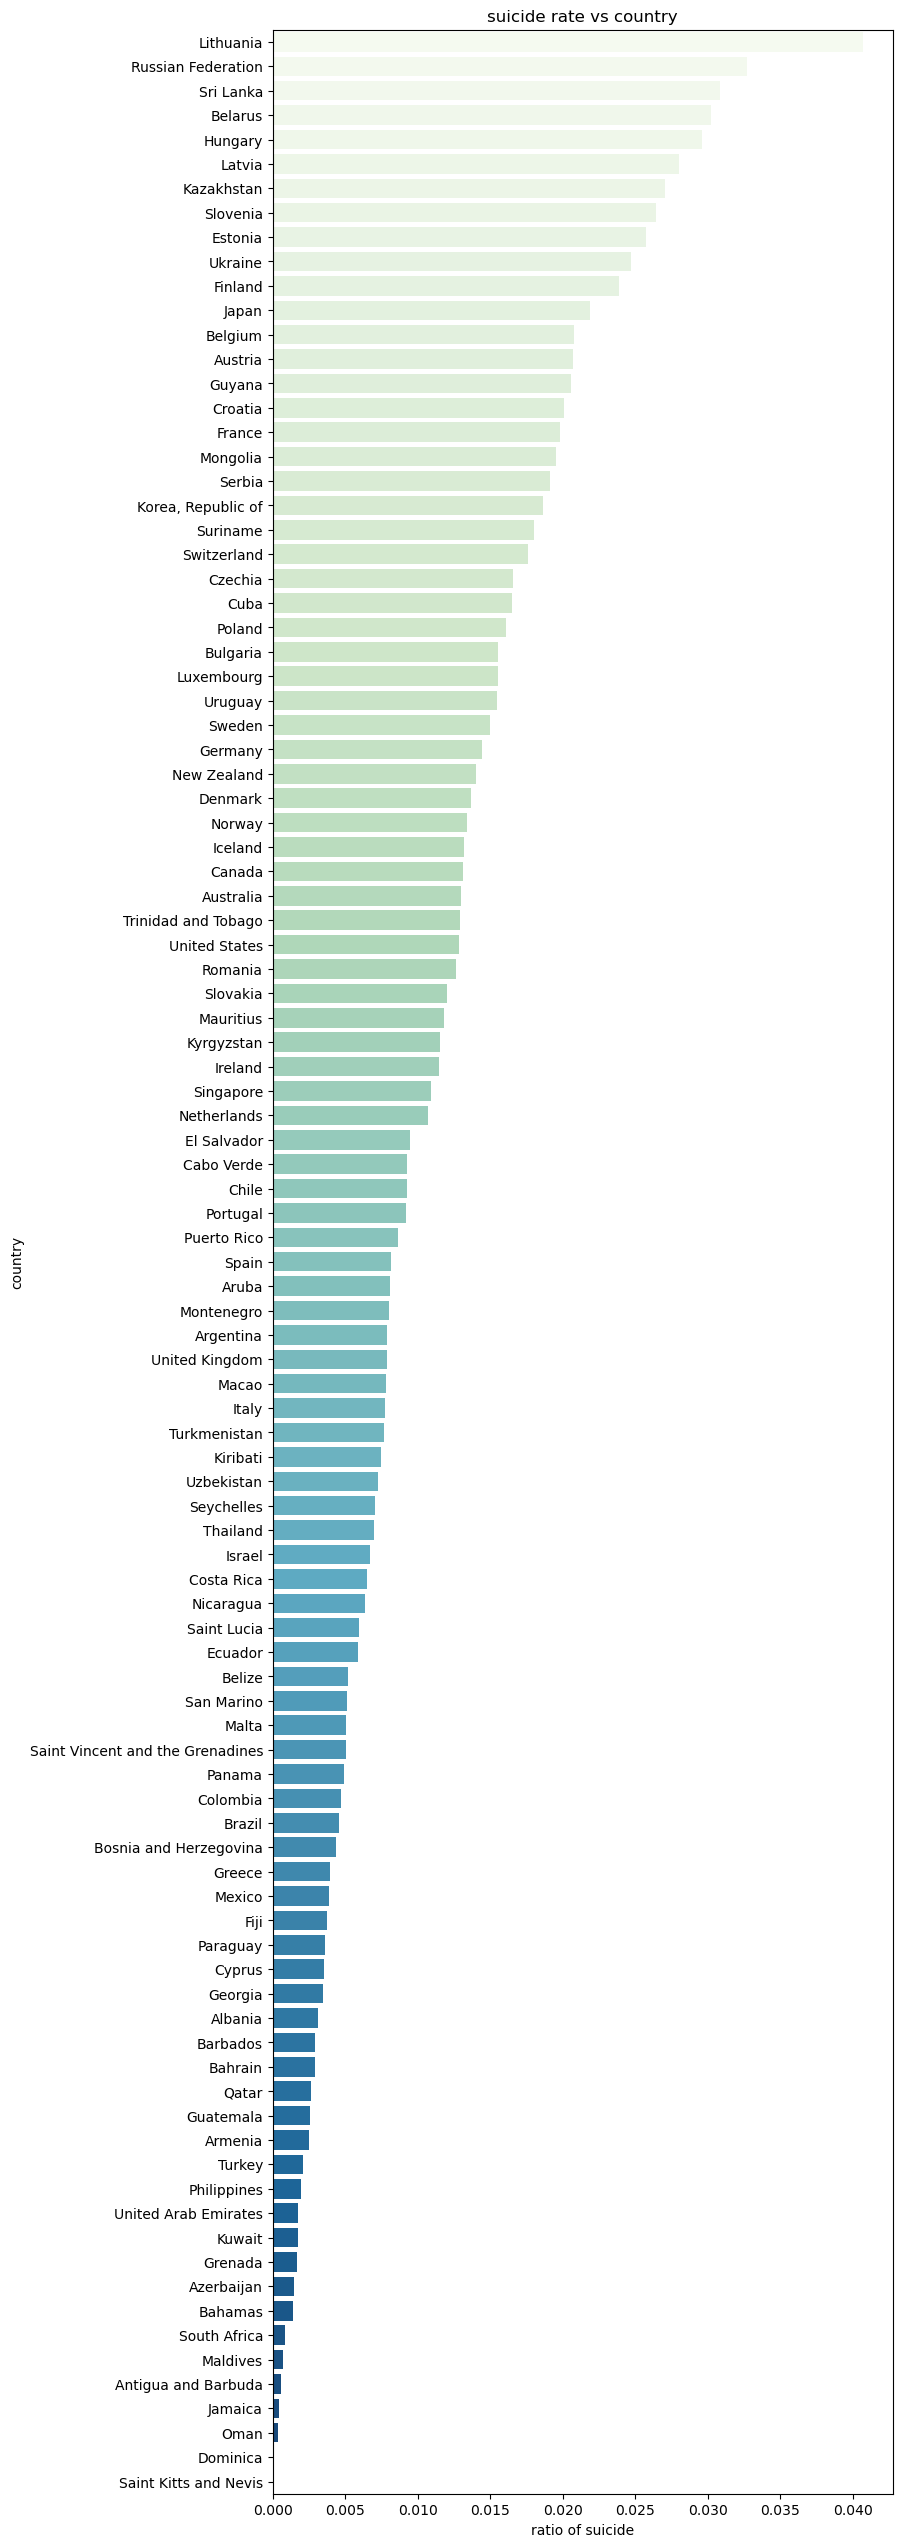

In [33]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

In [34]:
country_dict = dict()
for idx in range(len(country_list)):
    country_dict[countries[country_list[idx]]] = country_suicide[idx]

In [35]:
#Define a new dataframe. The columns are country code and suicide rate

new_country_dict = {}
new_country_dict["iso_a3"] = list(country_dict.keys())
new_country_dict["suicide_rate"] = list(country_dict.values())
new_country_df = pd.DataFrame(new_country_dict)
new_country_df.head()

,iso_a3,suicide_rate
0,LTU,0.040736
1,RUS,0.032703
2,LKA,0.030848
3,BLR,0.030231
4,HUN,0.029617


In [36]:
#Use geopandas library to get information of countries, including coordinate

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [37]:
#Merge two dataframe together
result = pd.merge(world, new_country_df, on = "iso_a3")
result.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,suicide_rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.003708
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.013131
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.012835
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",0.027041
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",0.007232


<AxesSubplot:title={'center':'world suicide rate'}>

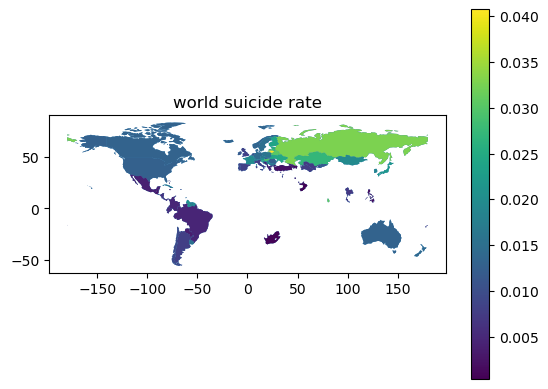

In [38]:
ax = result.plot()
ax.set_title("world suicide rate")
result.plot(column='suicide_rate', ax = ax, legend=True)

For top 10, seven tenth were former Soviet Union countries, located in eastern europe and Russia. Japan and Korea are also high-suicide-rate countries.

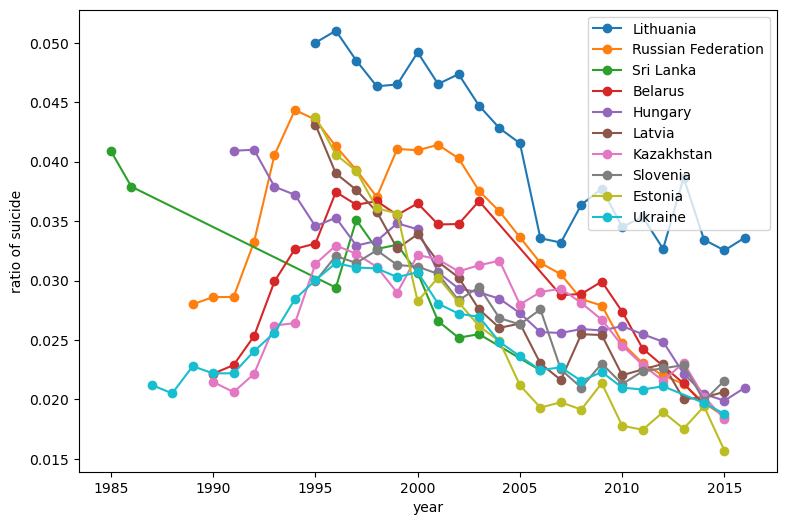

In [39]:
# Top 10 countries' suicide rate year by year

plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

It is clearly that the suicide rate of some top10 countries dramatically increased after 1990. In addition, the rate in others are still high during 1990 to 2000. The transition to the economy and democracy in former Soviet Union countries may be the main reasons. Although there have been numerous studies of the increase in mortality, such as alcoholism, economic hardship, despression and so on, but there is still no one accepted as the most significant factor of the mortality crisis.

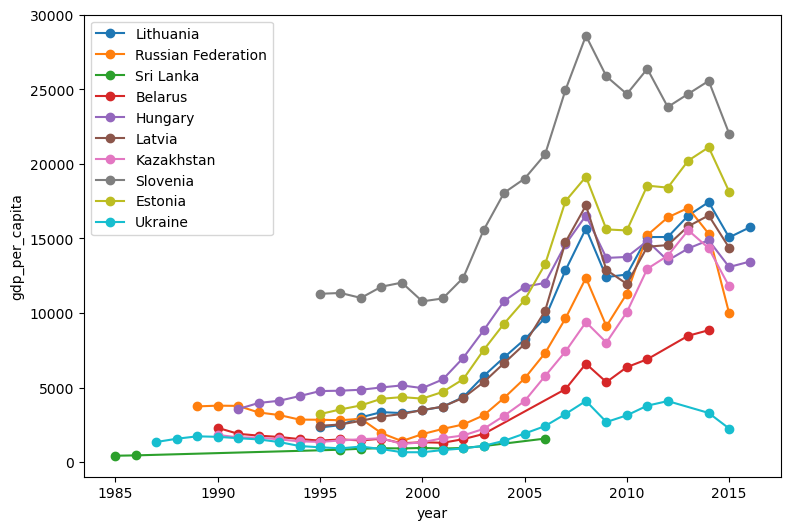

In [42]:
plt.figure(figsize = (9,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

From this image we can see that the gdp_per_capita has no differece during 1990 to 2000. In other words, the economic situation were remain stagnant and some countries got worse until 2002, after 2005, all countries' gdp start growing.

We also know that the whole gdp_per_capita dropped within 2008 because of the financial crisis. However, these ratio were still better than that before 2000. To see the relationship between suicide rate and gdp_per_capita, we plot the regression plot of two parameters.

In [44]:
from scipy import stats

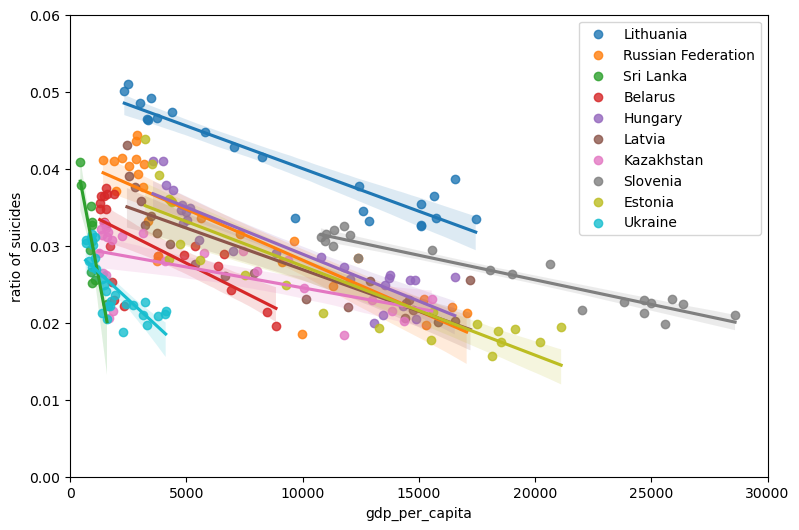

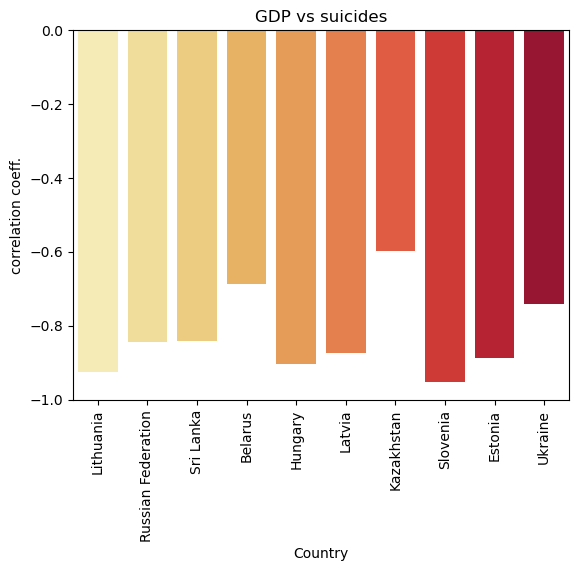

In [45]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

The suicide rate was highly correlated to the gdp_per_capita of top 10 countries.

D:\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
D:\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
D:\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


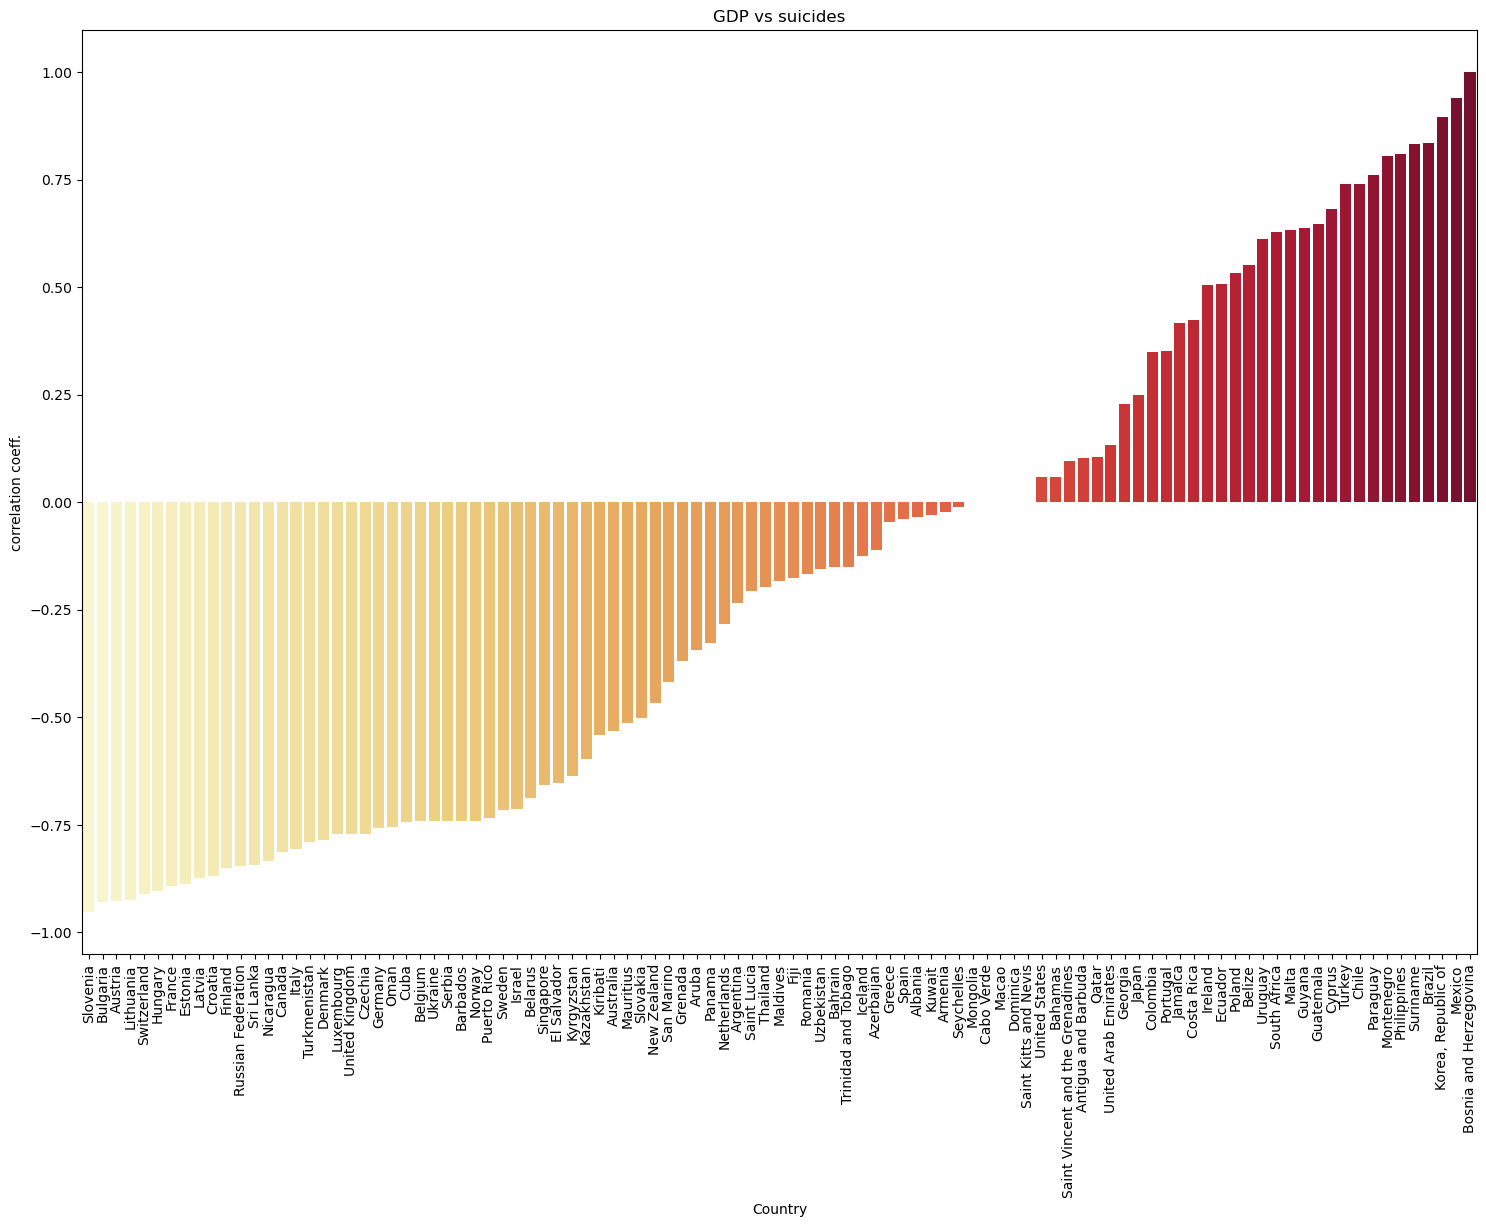

In [46]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

Lots of countries' suicide rate are negatively high related to gdp_per_capita, but there are some countries have opposite outcome.

In [47]:
#Calculate how many countries with correlation coefficient below -0.6 
high_relation_gdp = {a:b for a,b in dgp_relation.items() if b <= -0.6}
print(len(high_relation_gdp))
high_relation_gdp

36


{'Slovenia': -0.9529455791278115,
 'Bulgaria': -0.9287679102475701,
 'Austria': -0.9259200512084546,
 'Lithuania': -0.9239757987267332,
 'Switzerland': -0.9109503853299822,
 'Hungary': -0.9040354533627301,
 'France': -0.891033016219988,
 'Estonia': -0.8871441228139314,
 'Latvia': -0.8730699831833395,
 'Croatia': -0.8688905854455011,
 'Finland': -0.8510603475107353,
 'Russian Federation': -0.8447320241371793,
 'Sri Lanka': -0.8423723520534465,
 'Nicaragua': -0.8339461195785591,
 'Canada': -0.8137269827924933,
 'Italy': -0.8058989652804354,
 'Turkmenistan': -0.789798470389873,
 'Denmark': -0.785030750255649,
 'Luxembourg': -0.7712677174711061,
 'United Kingdom': -0.7709229981372079,
 'Czechia': -0.7706689026781656,
 'Germany': -0.7567584036061585,
 'Oman': -0.7547353920453065,
 'Cuba': -0.7437036777206897,
 'Belgium': -0.7416790406841788,
 'Ukraine': -0.7413562367777868,
 'Serbia': -0.7411928190991895,
 'Barbados': -0.7409526707249006,
 'Norway': -0.7406431335510837,
 'Puerto Rico': -0.7

About one third countries had high relationship with gdp_per_capita. We can say that gdp was another reason of high suicide rate.

In [48]:
#The countries which relation coefficient are higher than 0.6 

positive_relation_gdp = {a:b for a,b in corr_eff.items() if b > 0.6}
positive_relation_tup = list(positive_relation_gdp.items())
positive_relation_tup.sort(key= lambda pair:pair[1], reverse = True)
positive_relation = {a[0]:a[1] for a in positive_relation_tup}
print(len(positive_relation))
positive_relation

16


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Mexico': 0.9392731898535472,
 'Korea, Republic of': 0.8967892885653613,
 'Brazil': 0.8356111067311864,
 'Suriname': 0.8333078326024657,
 'Philippines': 0.8099497394094539,
 'Montenegro': 0.8042382321252367,
 'Paraguay': 0.7599968993976424,
 'Chile': 0.7412265208253951,
 'Turkey': 0.7398789818429371,
 'Cyprus': 0.6812947745988278,
 'Guatemala': 0.6460477591267608,
 'Guyana': 0.6379567025207803,
 'Malta': 0.6334189190517482,
 'South Africa': 0.6287573335302014,
 'Uruguay': 0.61206046817105}

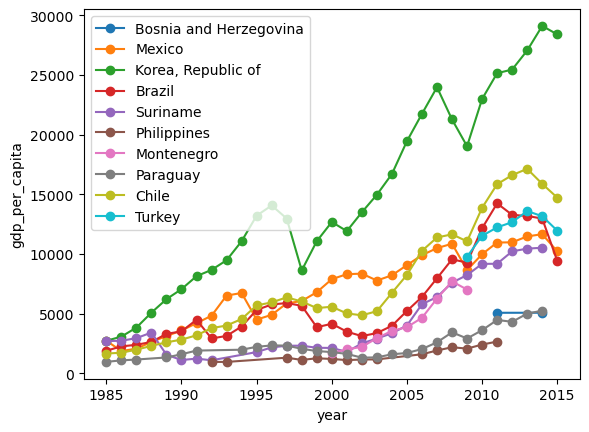

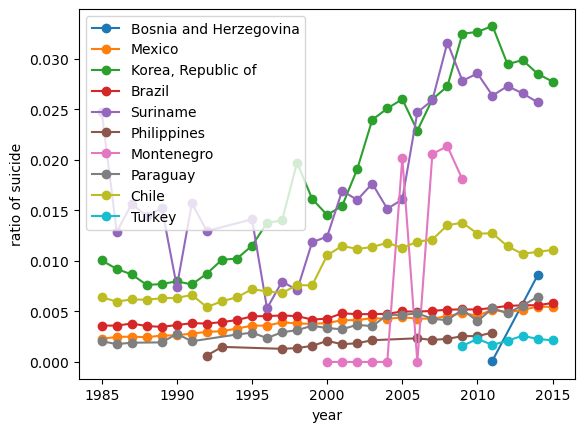

In [49]:
city_list = list({a:b for a,b in positive_relation.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

for country in city_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

It's weird that the gdp_per_capita and suicide rate of Korea are growing faster. Does it mean that there are social problems that cause the situation like that!?

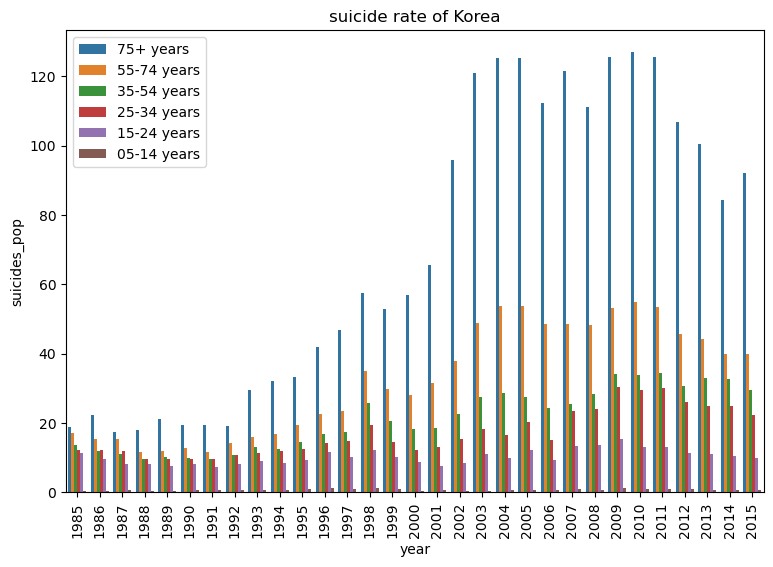

In [50]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None,data = (df[df["country"] == "Korea, Republic of"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

What's going on with old people in Korea!? After 2000, the suicide rate of people over 75 years old is almost double. Was Korea society not friendly to the old people or the enviroment depressed the old people? As we mentioned early, age is a factor of high suicide rate. A country should setup social welfare to take care of old people just in case.

On the other hand, the rate of people whose age is over 24 are growing after 1992. This phenomenon reflects the increasing burden on society, like salary, academic pressure, family and so on.

# Conclusion
In general, the suicide rate is related to several factors. First, national GDP per person. We have seen that the suicide rate in many countries is highly correlated with the gdp of the whole country, which shows that the degree of national wealth has a certain degree of reduction in suicide rate.

Second, the age. According to the suicide rate of each level of age, the rate of elderly is higher, so young people should care more about the elderly. Moreover, the country welfare of the elderly may also impact the rate.

Third, the social pressure. A healthy society can make citizens feel safe and satisfied, so how to relieve the social pressure becomes a significant topic for every country. Our purpose is not only reduce the suicide rate but also to build a better world.